
*   **Group Member:** Seyit Semih Yiğitarslan (Group 08)
*   **METU Student Number:** 2655074
*   ssyigitarslan@gmail.com & e265507@metu.edu.tr
METU CENG796
# Paper Title: END-TO-END DEEP STRUCTURE GENERATIVE MODELFOR PROTEIN DESIGN
*   **Paper Link:** https://www.biorxiv.org/content/10.1101/2022.07.09.499440v1.full.pdf
*   **Paper Authors:** Boqiao Lai, Jinbo Xu∗, and Matt McPartlon




**INTRODUCTION**

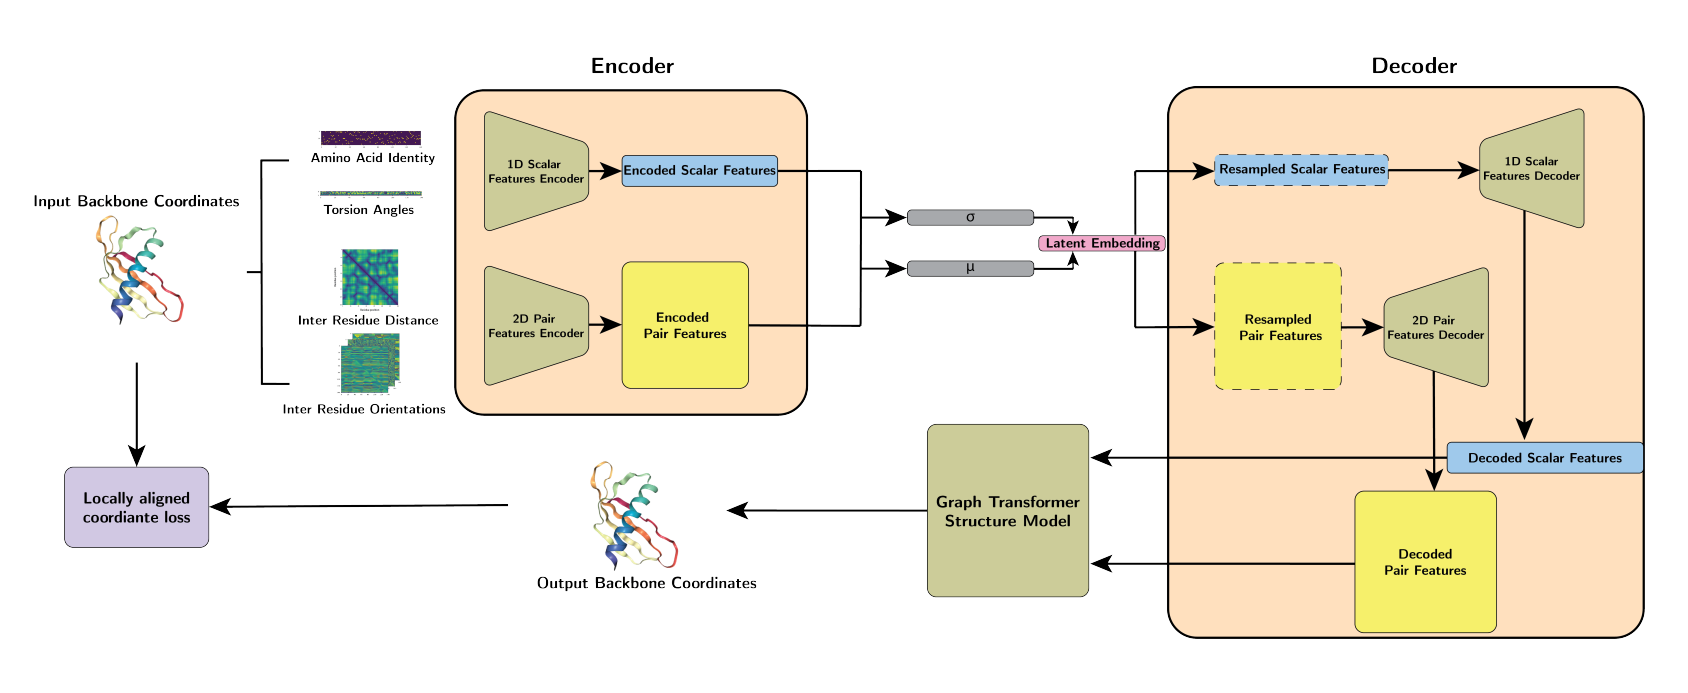


Model Overview

In this project, the aim is to predict new 3D protein models using the data set obtained from the CATH4.2 protein bank within the scope of the CENG796 course, using the VAE (Variational Autoencoder) approach.

The main.ipynb file explains how to download the data set, how the generative model approach works, and the challenges encountered in the project. However, due to an issue in running the model, no progress could be made beyond a certain point.


In [ ]:
# END-TO-END DEEP STRUCTURE GENERATIVE MODELFOR PROTEIN DESIGN

**Connection Google Drive**

In [2]:
# Located the main file
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Add Dataset

In [3]:
# Başlangıç yolu
%cd /content/
%ls drive/MyDrive/
%cd drive/MyDrive

/content
 CENG796/   CMP712/  'Colab Notebooks'/
/content/drive/MyDrive


In [4]:
# Create CENG79 Folder
%mkdir CENG796

%ls

mkdir: cannot create directory ‘CENG796’: File exists
 CENG796/   CMP712/  'Colab Notebooks'/


Go to the created Folder

In [5]:
%cd /content/drive/MyDrive/CENG796
%pwd

/content/drive/MyDrive/CENG796


'/content/drive/MyDrive/CENG796'

Download the CATH4.2 dataset from the desired website.

Dataset from [Generative Models Paper](https://www.mit.edu/~vgarg/GenerativeModelsForProteinDesign.pdf)      

> [Github Link](https://github.com/jingraham/neurips19-graph-protein-design)

> [Dataset Link](http://people.csail.mit.edu/ingraham/graph-protein-design/data/)





In [ ]:
# Use this code to download dataset, and use local machine (linux) Thanks to this, dirs cut with 2 times, and data folder saved on the desired path

!wget -r -np -nH --cut-dirs=2 --reject "index.html*" http://people.csail.mit.edu/ingraham/graph-protein-design/data/


--2023-05-21 20:15:05--  http://people.csail.mit.edu/ingraham/graph-protein-design/data/
Resolving people.csail.mit.edu (people.csail.mit.edu)... 128.30.2.133
Connecting to people.csail.mit.edu (people.csail.mit.edu)|128.30.2.133|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1418 (1.4K) [text/html]
Saving to: ‘data/index.html.tmp’

data/index.html.tmp 100%[===================>]   1.38K  --.-KB/s    in 0s      

2023-05-21 20:15:05 (81.3 MB/s) - ‘data/index.html.tmp’ saved [1418/1418]

Loading robots.txt; please ignore errors.
--2023-05-21 20:15:05--  http://people.csail.mit.edu/robots.txt
Reusing existing connection to people.csail.mit.edu:80.
HTTP request sent, awaiting response... 200 OK
Length: 1149 (1.1K) [text/plain]
Saving to: ‘robots.txt’

robots.txt          100%[===================>]   1.12K  --.-KB/s    in 0s      

2023-05-21 20:15:05 (92.8 MB/s) - ‘robots.txt’ saved [1149/1149]

Removing data/index.html.tmp since it should be rejected.

--2023-05-

Desired dataset path

In [6]:
%ls
# project path
%cd /content/drive/MyDrive/CENG796
dataset_path = "data/"

%pwd

data/
/content/drive/MyDrive/CENG796


'/content/drive/MyDrive/CENG796'

**Code Running**

In [7]:
# Download biopython
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 60.9 MB/s eta 0:00:00


**Add necessary Python Libraries**

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from Bio.PDB import PDBParser, Superimposer
import json
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow.keras import layers, models, losses


The aim was to visualize the 3D protein models from chain_set.jsonl (based on the sequence and coord connections). The visualization of the protein model in 3D was intended for the protein modeling approach shown in Figure 2a.

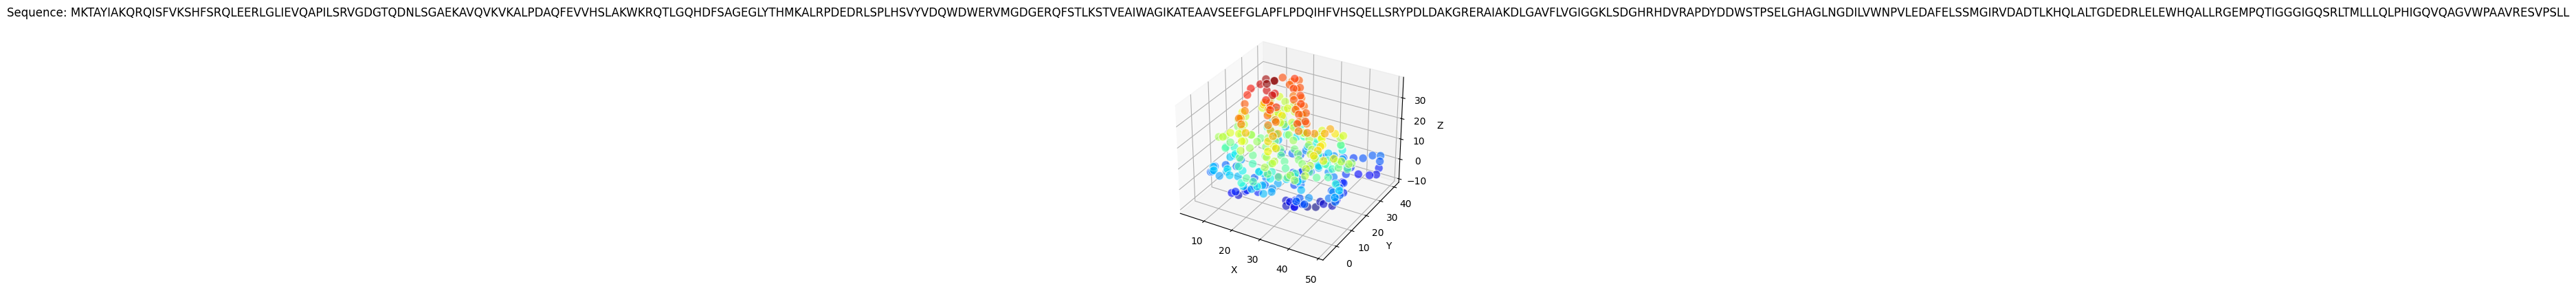

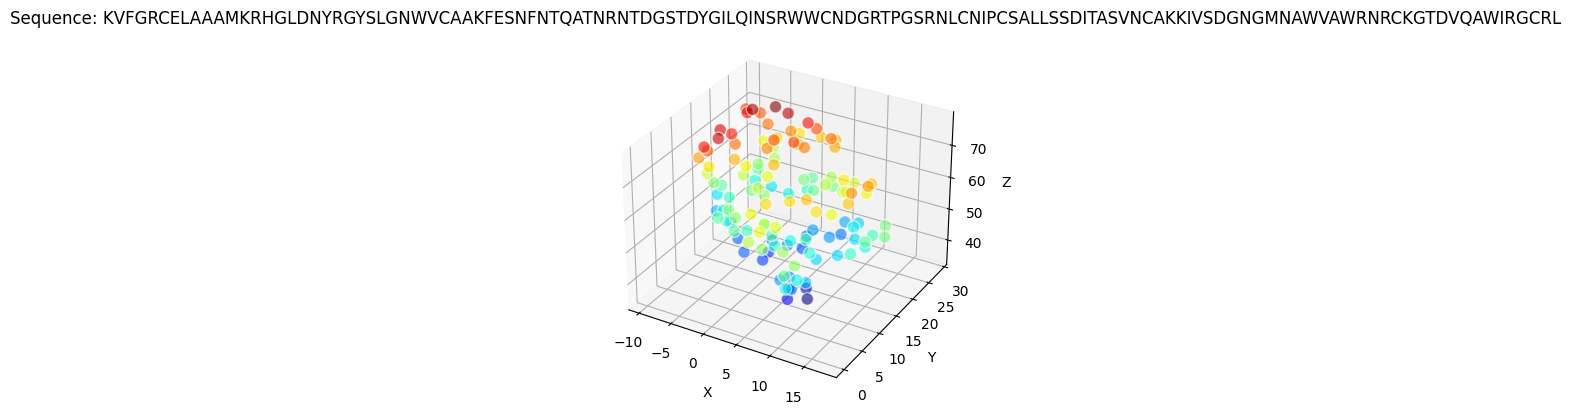

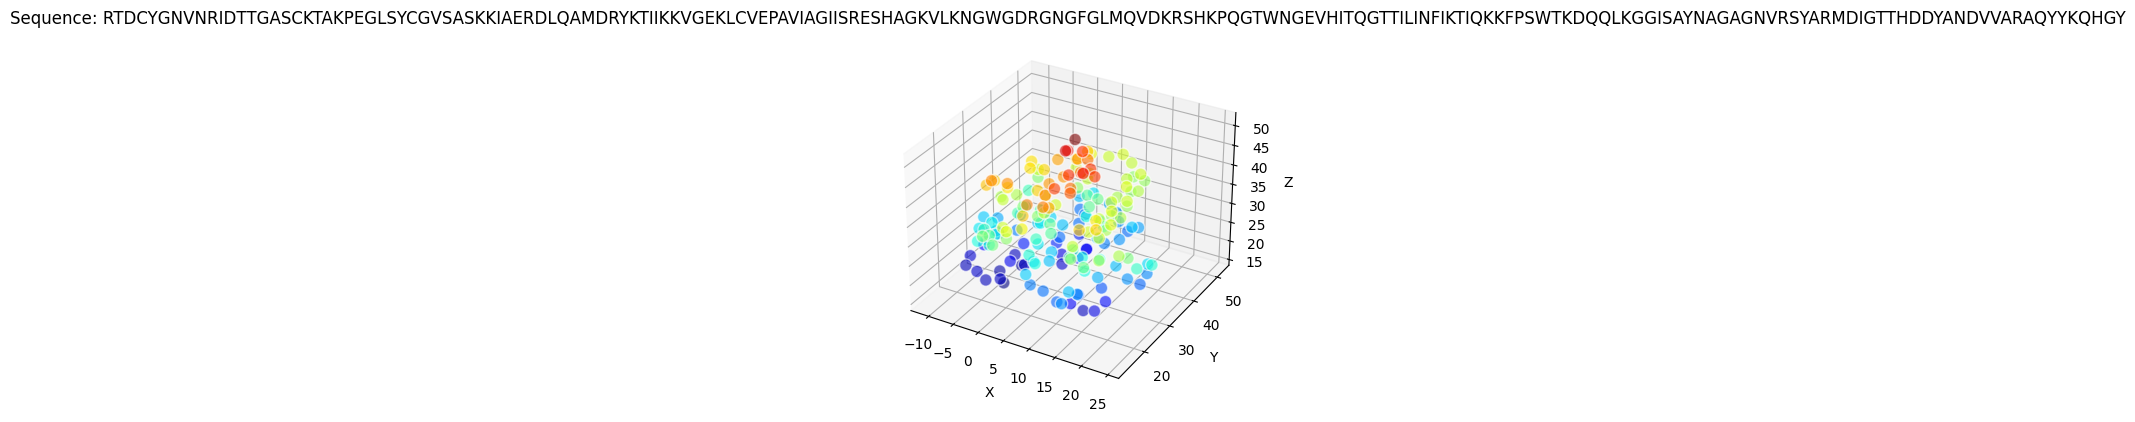

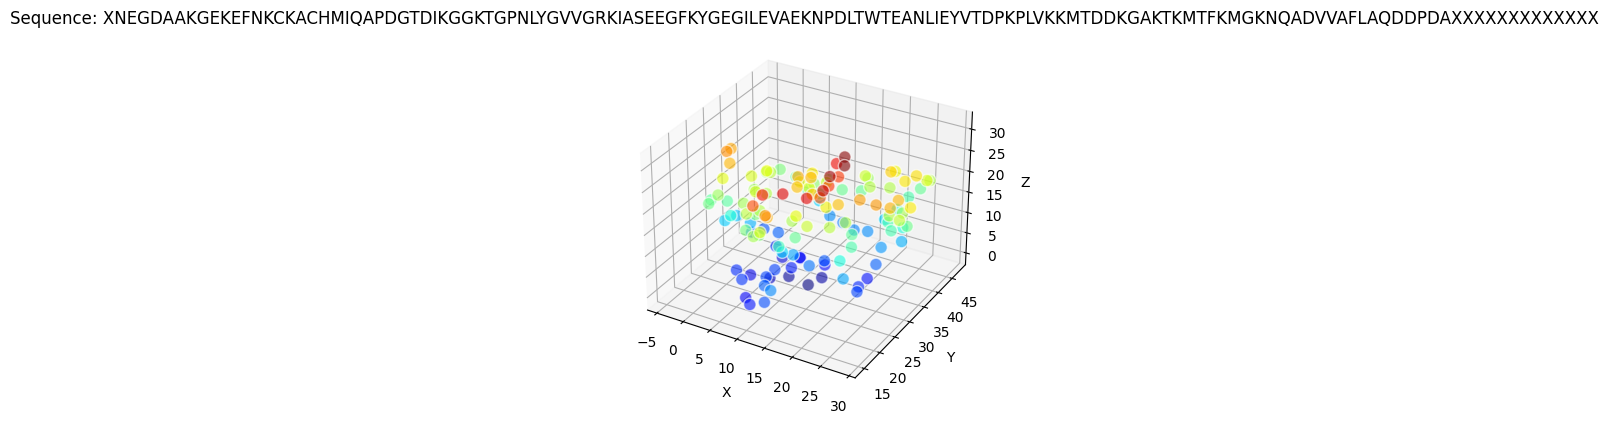

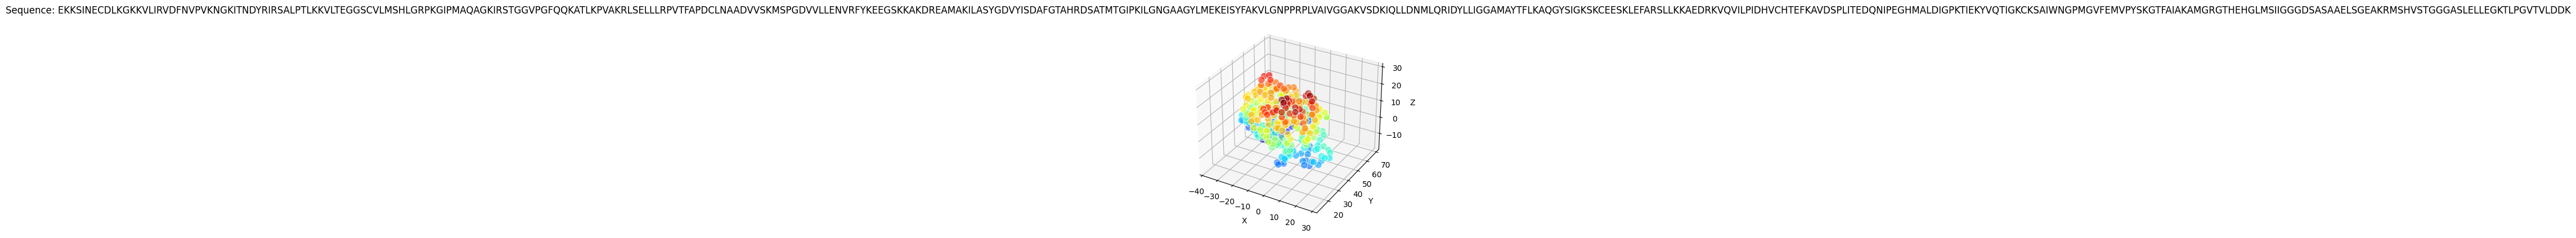

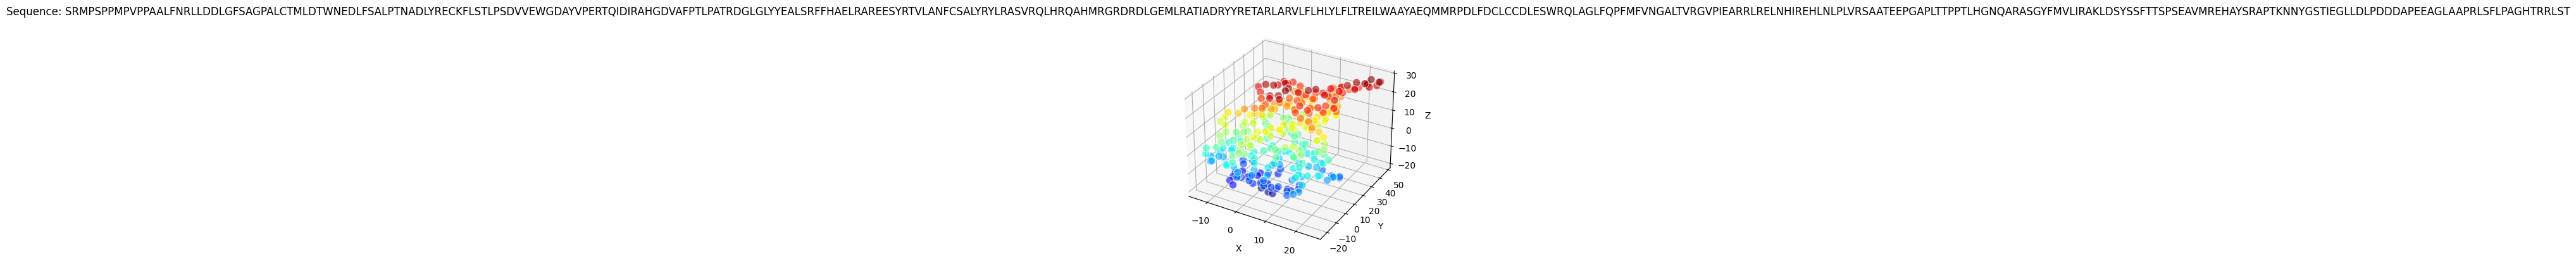

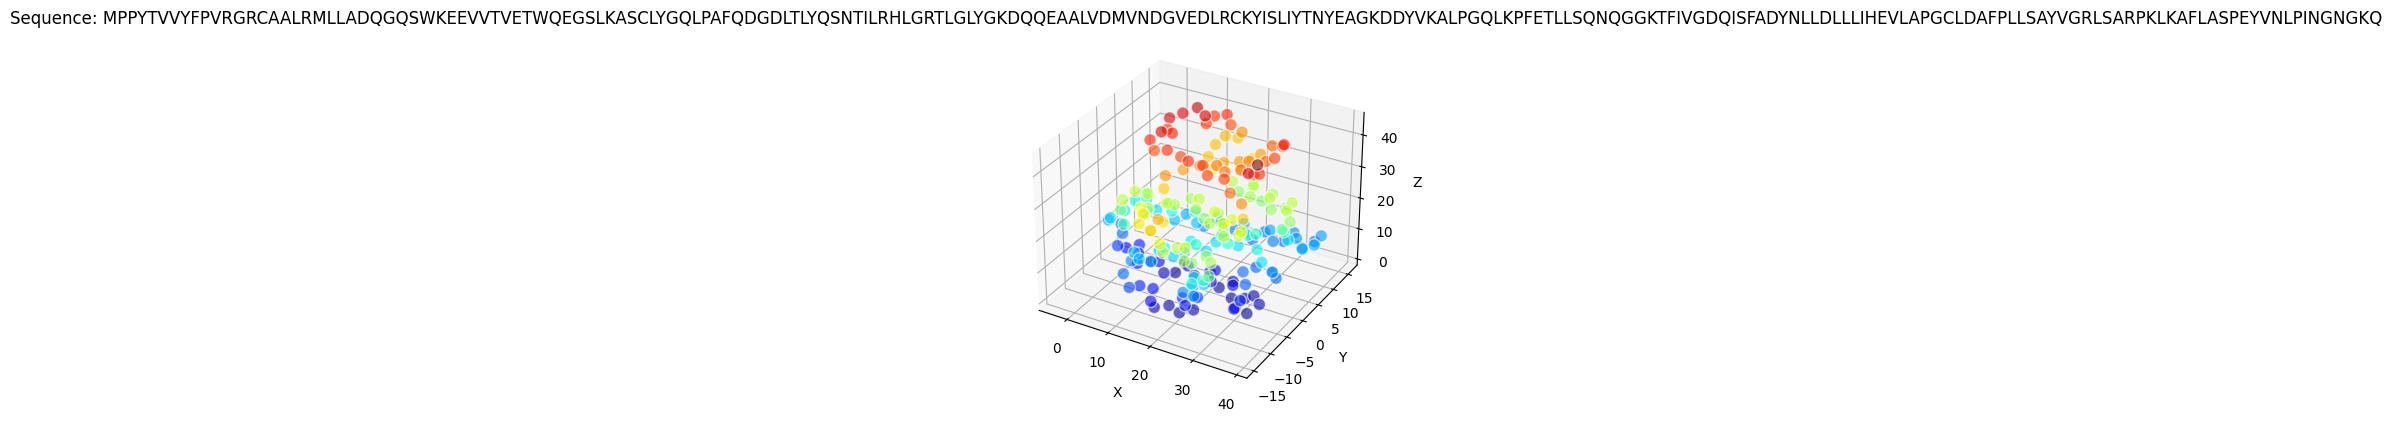

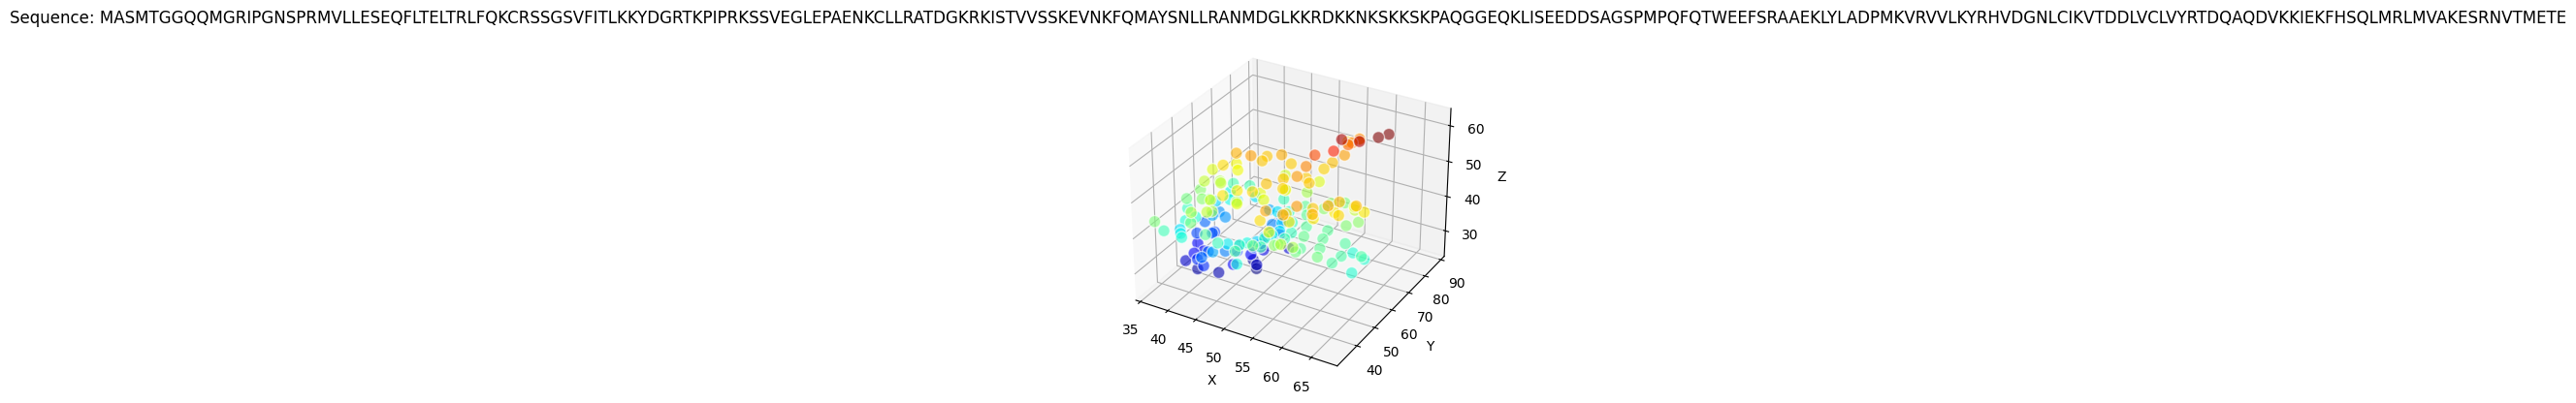

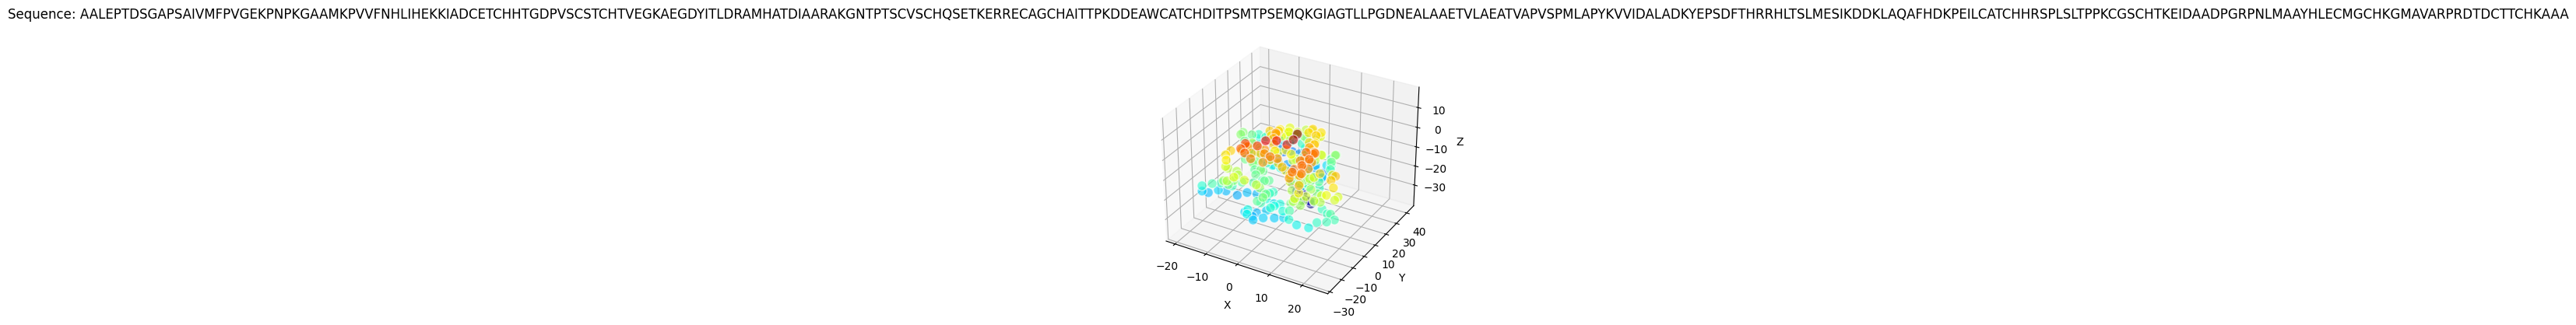

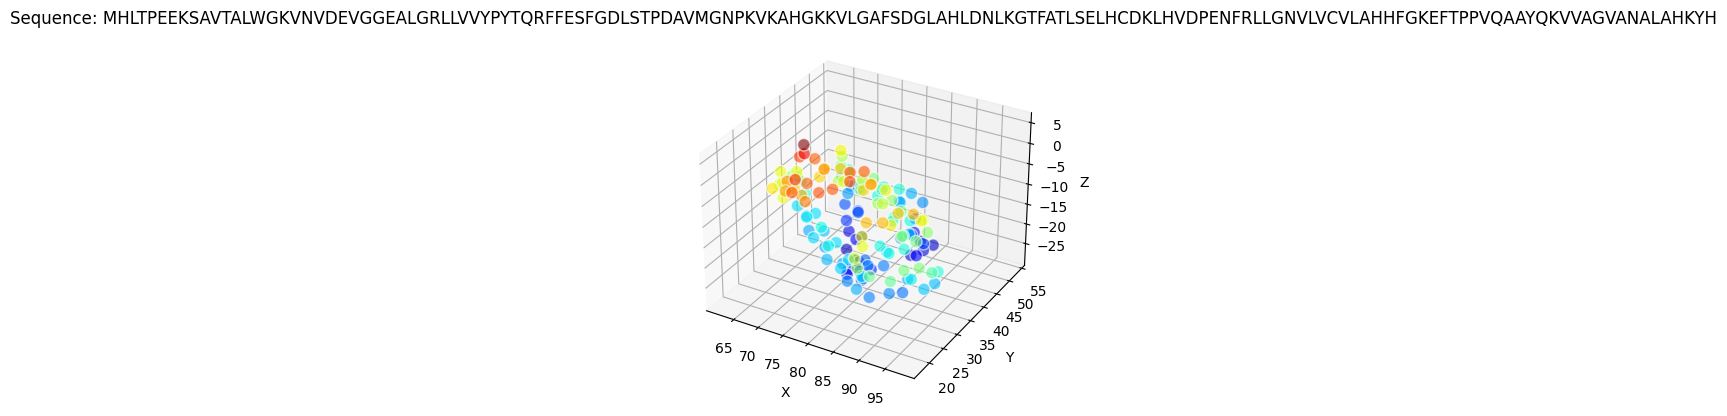

<ipython-input-9-8145b4e59fc5>:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  coordinate_data = np.array(coordinate_data)


In [9]:
# Open JSON Lines file and load its content
with open('data/cath/chain_set.jsonl', 'r') as f:
    lines = f.readlines()

# To store sequence and coordinates data
sequence_data = []
coordinate_data = []

# For each chain, create a 3D image 
# Render figures for the first 10, just store the rest as arrays
for idx, line in enumerate(lines):
    chain_data = json.loads(line)  # Parse JSON line into python object
    seq = chain_data['seq']  # Extract sequence data
    coordinates = chain_data['coords']['N']  # Extract coordinates data
    coordinates = np.array(coordinates)  # Convert list of coordinates to numpy array

    # Store sequence and coordinates data
    sequence_data.append(seq)
    coordinate_data.append(coordinates)

    # Plot the first 10 chains
    if idx < 10:
        # Create a 3D figure
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')  # Set 3D projection
        # Scatter plot with color map based on Z-axis values, semi-transparent points with white edges
        ax.scatter(coordinates[:, 0], coordinates[:, 1], coordinates[:, 2], c=coordinates[:, 2], cmap='jet', alpha=0.6, edgecolors='w', s=80)
        ax.set_xlabel('X')  # Label X-axis
        ax.set_ylabel('Y')  # Label Y-axis
        ax.set_zlabel('Z')  # Label Z-axis
        plt.title(f"Sequence: {seq}")  # Add a title showing sequence data
        plt.show()  # Display the plot

# Convert all sequence and coordinates data to numpy arrays for further processing
sequence_data = np.array(sequence_data)       
coordinate_data = np.array(coordinate_data)



**sequence array**



In [52]:
len(sequence_data)   # The length of the sequence_data array is being checked. Based on this, the dataset will be reorganized.

21668

**Coordinate Array**

In [15]:
coordinate_data[0]   # The content of the coordinate_data array is being examined. In order for it to be compatible with our model, it needs to be flattened into a single dimension.

array([[        nan,         nan,         nan],
       [        nan,         nan,         nan],
       [        nan,         nan,         nan],
       [ 1.1751e+01,  3.7846e+01,  2.9016e+01],
       [ 1.4235e+01,  3.9531e+01,  2.6906e+01],
       [ 1.6789e+01,  3.9630e+01,  2.8369e+01],
       [ 1.6368e+01,  3.7519e+01,  3.0261e+01],
       [ 1.5825e+01,  3.5211e+01,  2.8535e+01],
       [ 1.8356e+01,  3.5312e+01,  2.7173e+01],
       [ 2.0058e+01,  3.4382e+01,  2.9069e+01],
       [ 1.9058e+01,  3.1934e+01,  2.9727e+01],
       [ 1.9717e+01,  3.0651e+01,  2.7158e+01],
       [ 2.2605e+01,  3.0674e+01,  2.7231e+01],
       [ 2.3135e+01,  2.9011e+01,  2.9549e+01],
       [ 2.2212e+01,  2.6467e+01,  2.8766e+01],
       [ 2.3836e+01,  2.5867e+01,  2.6433e+01],
       [ 2.6217e+01,  2.5775e+01,  2.7631e+01],
       [ 2.6117e+01,  2.3919e+01,  2.9813e+01],
       [ 2.5584e+01,  2.1496e+01,  2.8388e+01],
       [ 2.7852e+01,  2.1504e+01,  2.6853e+01],
       [ 2.9670e+01,  2.0723e+01,  2.877

**DATASET OPERATIONS**


Before creating the model for predicting 3D protein design, the most crucial part is, of course, thoroughly analyzing the data. This section focuses on the analysis of the data.

**Analyzing the JSON dataset files.**

In [ ]:
# Function to read JSON files
def load_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

# Load the 'chain_set_splits.json' file
chain_set_splits_path = 'data/cath/chain_set_splits.json'
chain_set_splits_data = load_json(chain_set_splits_path)

# Load the 'ollikainen_set.jsonl' file
ollikainen_set_path = 'data/ollikainen/ollikainen_set.jsonl'
ollikainen_set_data = []
with open(ollikainen_set_path, 'r') as f:
    for line in f:
        data = json.loads(line)
        ollikainen_set_data.append(data)

# Load the 'test_split_L100.json' file
test_split_L100_path = 'data/SPIN2/test_split_L100.json'
test_split_L100_data = load_json(test_split_L100_path)

# Load the 'test_split_sc.json' file
test_split_sc_path = 'data/SPIN2/test_split_sc.json'
test_split_sc_data = load_json(test_split_sc_path)

# Perform analysis operations
# For example, you can print out the size of each data set
print("Size of 'chain_set_splits.json' data set:", len(chain_set_splits_data))
print("Size of 'ollikainen_set.jsonl' data set:", len(ollikainen_set_data))
print("Size of 'test_split_L100.json' data set:", len(test_split_L100_data['test']))
print("Size of 'test_split_sc.json' data set:", len(test_split_sc_data['test']))


chain_set_splits.json veri seti boyutu: 4
ollikainen_set.jsonl veri seti boyutu: 40
test_split_L100.json veri seti boyutu: 94
test_split_sc.json veri seti boyutu: 103


We have not reached this stage yet, but when Figure 2 is plotted, protein structures with the "pdb" extension will be saved, and plotting operations will be performed accordingly. Since there are no pdb files available yet, the desired outputs as shown in Figure 2 cannot be obtained. Using pdb files provides more detailed information about the proteins and visually enhances the figures. Here is an example of a figure drawn using "pdb":

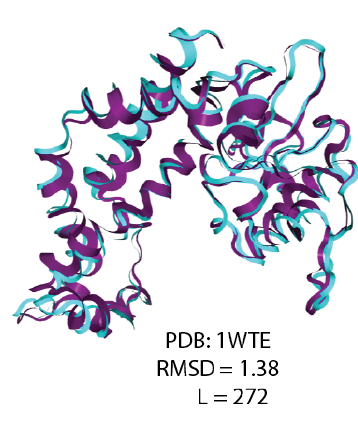

In [ ]:
# Dataset Folder
data_folder = 'data'

protein_paths = {
    '1WTE': os.path.join(data_folder, 'SPIN2/1WTE.pdb'),
    '3ZIJ': os.path.join(data_folder, 'SPIN2/3ZIJ.pdb'),
    '2JAC': os.path.join(data_folder, 'SPIN2/2JAC.pdb')
}
print(os.listdir(os.path.join(data_folder, 'SPIN2')))


['test_split_L100.json', 'test_split_sc.json']


**Data Operation**
Since coordinate_data represents three-dimensional coordinate information, it needs to be flattened. This means that all the coordinates will be combined into a single dimension. This allows the data to be fed into a neural network.

On the other hand, sequence data represents the amino acids of the protein chain. In this case, an embedding process needs to be performed.

In [59]:
# In this section, it is desired to reduce the 'coordinate_data' array to one dimension.
all_coordinate_len = 0
val_i = 0
val_j = 0
val_k = 0
while val_i < len(coordinate_data):
  val_j = 0
  while val_j < len(coordinate_data[val_i]):
    val_k = 0
    while val_k < len(coordinate_data[val_i][val_j]):
          # Increase the total coordinate length by one for each coordinate value encountered
          all_coordinate_len = all_coordinate_len + 1
          # Access the particular coordinate value
          coordinate_data[val_i][val_j][val_k]
          val_k = val_k + 1
    val_j = val_j + 1
  val_i = val_i + 1

# In this part, the value for 'original_dim' is found.
print(all_coordinate_len)


15134349


**Hyperparameters**

In [53]:
# Define hyperparameters
original_dim = len(sequence_data[0]) # Dimension of the input data
intermediate_dim = 256  # Dimension of the hidden layers in the Encoder and Decoder
latent_dim = 2  # Dimension of the latent space

**VAE Approach**

In [55]:
# This class will be used for the stochastic latent variable sampling
class Sampling(layers.Layer):
    # This function creates a stochastic variable z.
    # z is created by using a mean and variance as parameters of a normal distribution
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Encoder model: Maps the input to the parameters of a probability distribution, i.e., mean and log variance
class Encoder(models.Model):
    def __init__(self, **kwargs):
        super(Encoder, self).__init__(**kwargs)
        # Create a dense layer with 'intermediate_dim' neurons and 'relu' activation function
        self.dense_proj = layers.Dense(intermediate_dim, activation='relu')
        # Two output layers that will output mean and log variance
        self.dense_mean = layers.Dense(latent_dim)
        self.dense_log_var = layers.Dense(latent_dim)
        # Sampling layer
        self.sampling = Sampling()

    def call(self, inputs):
        h = self.dense_proj(inputs)  # Apply dense layer
        z_mean = self.dense_mean(h)  # Get mean
        z_log_var = self.dense_log_var(h)  # Get log variance
        z = self.sampling((z_mean, z_log_var))  # Sample from the distribution
        return z_mean, z_log_var, z

# Decoder model: Maps the latent space points back to original input data
class Decoder(models.Model):
    def __init__(self, **kwargs):
        super(Decoder, self).__init__(**kwargs)
        # Create a dense layer with 'intermediate_dim' neurons and 'relu' activation function
        self.dense_proj = layers.Dense(intermediate_dim, activation='relu')
        # Output layer that will output the reconstructed input
        self.dense_output = layers.Dense(original_dim, activation='sigmoid')

    def call(self, inputs):
        h = self.dense_proj(inputs)  # Apply dense layer
        return self.dense_output(h)  # Output reconstructed input

# Variational AutoEncoder (VAE) model: Combines the encoder and decoder into an end-to-end model
class VAE(models.Model):
    def __init__(self, **kwargs):
        super(VAE, self).__init__(**kwargs)
        # Define encoder and decoder models
        self.encoder = Encoder(latent_dim=latent_dim, intermediate_dim=intermediate_dim)
        self.decoder = Decoder(original_dim, intermediate_dim=intermediate_dim)

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)  # Encode input
        reconstructed = self.decoder(z)  # Decode from the latent space
        # Add KL divergence regularization loss
        kl_loss = -0.5 * tf.reduce_mean(z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)
        self.add_loss(kl_loss)
        return reconstructed  # Return reconstructed input
"""
# create VAE model
vae = VAE(original_dim=original_dim, intermediate_dim=intermediate_dim, latent_dim=latent_dim)

# compile
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
vae.compile(optimizer, loss=losses.MeanSquaredError())
vae.fit(sequence_data, epochs=50, batch_size=32)"""



'\n# create VAE model\nvae = VAE(original_dim=original_dim, intermediate_dim=intermediate_dim, latent_dim=latent_dim)\n\n# compile\noptimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)\nvae.compile(optimizer, loss=losses.MeanSquaredError())\nvae.fit(sequence_data, epochs=50, batch_size=32)'

Training, and Test set

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, losses

# Class definitions will remain the same...

# Model parameters
original_dim = all_coordinate_len  # We use the dimension of the 'coordinate_data'
intermediate_dim = 256
latent_dim = 2

# Construct the VAE model
vae = VAE(original_dim, intermediate_dim, latent_dim)

# Flatten the 3D coordinate data
coordinate_data_flattened = coordinate_data.reshape(coordinate_data.shape[0], -1)

# Split the data into training and test sets
train_size = int(0.5 * len(coordinate_data_flattened))  # 50% of the data is for training
x_train = coordinate_data_flattened[:train_size]
x_test = coordinate_data_flattened[train_size:]

# Compile and train the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
vae.compile(optimizer, loss=losses.MeanSquaredError())
vae.fit(x_train, x_train, epochs=50, batch_size=32)

# Evaluate the model on the test dataset
result = vae.evaluate(x_test, x_test)
print("Test set loss: ", result)



**Difficulties**

Due to the considerable size of the CATH4.2 dataset used for protein design, some issues have arisen in the data set arrangement. Additionally, 3D protein design poses some challenges in terms of GPU and RAM usage. The complexity of the methods used in the study and the absence of a code repository also make it difficult to reproduce the model. Therefore, an example code has been written and will be run in Version 2.

Also, the code looked at the entire dimension of the coordinates and it turned out to be 15134349 in length. Regarding this, some simplifications and data cleaning operations need to be done first. However, great care must be taken when processing data for accurate 3D protein prediction.
